<a href="https://colab.research.google.com/github/modidiviyansh/National-Anthem-Sentiment-Analysis/blob/main/NationalAnthemSentimentAnalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#basic import 
!pip install Unidecode
import pandas as pd
import re
#nltk imports

import nltk
#sentence tokenizer : paragraph converts into setences
from nltk.tokenize import sent_tokenize

#word tokenizer : paragraph converted into set of words
from nltk.tokenize import word_tokenize

#helps find the frequency of words occuring in a sentence
from nltk.probability import FreqDist

#if I see that , I have got most of frequency lying with english alphabets , then I need to apply stopword limitization
from nltk.corpus import stopwords

#Limitizer : to convert the words into the basic verb-form of the word
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk                             import SnowballStemmer
from unidecode                        import unidecode

from sklearn import cluster
# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.0 MB/s eta 0:00:00


In [ ]:
#one-time run download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

ds = pd.read_csv("https://raw.githubusercontent.com/lucas-de-sa/national-anthems-clustering/master/datasets/anthems.csv")

In [ ]:
ds.head(5)

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [ ]:
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

stop_words = stopwords.words('english')
lmtzr=WordNetLemmatizer()
param_stemmer = SnowballStemmer('english')
  
def two_single(list_of):
  words = []
  for i in list_of:
    if len(i)<=2 or len(i)>21:
      words.append(i)
  return words  

def country_list(ds):
  df = []
  for index,row in ds.iterrows():
    sentence = row['Country']
    df.append(sentence)
  return df
countries = country_list(ds)

def preprocessdata(sentence):
  new = []
  sentence = re.sub(r'[^\w\s]','',sentence)
  sentence = re.sub(r'http\S+', '', sentence)  
  sentence = re.sub(r'www\S+', '', sentence)
  # word tokenization

  words= nltk.word_tokenize(sentence)
  
        
  two_single_digit_words = two_single(words)
  
  words = [w for w in words if not w in two_single_digit_words]
  words = [w for w in words if not w in countries]
  words = [w for w in words if not w in stop_words]
  #apply lemmatizer
  for word in words:
    new.append(lem.lemmatize(word))

  #apply stemming
  hey = applyStemming(new,param_stemmer)
  return hey

  
  

  
    

In [ ]:
type(stopwords)

nltk.corpus.reader.wordlist.WordListCorpusReader

In [ ]:
newdf = []
for index,row in ds.iterrows():


  sentence = row['Anthem']
  new_sentence = " ".join(preprocessdata(sentence))
  newdf.append(new_sentence)


In [ ]:
newdf

['around flag stand unit with one wish one goal sacr oath bestow upon proclaim loyalti salvat from war abstain who traitor born true man frighten but dy warrior caus with weapon hand abrandish defend fatherland our sacr right weãââll relinquish the foe place land for god proclaim the nation earth shall wane and yet live thrive for fight flag flag sacr symbol upon swear for dear fatherland for honour glori brave man name honour the one sacrif fatherland forev rememb earth saint',
 'our fatherland free independ that centuri live summon son free independ here flag brother that sewn hand over sleepless night and bath tear look tricolor valuabl symbol let shine enemi let glorious forev death everywher man dy bless one dy for freedom nation',
 'land mountain land river land field land cathedr land hammer promis futur home great daughter son peopl high gift beauti art muchprais strong feud fierc hardfought thou liest middl contin like strong heart sinc earli day ancestor thou hast born burden

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newdf)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))



190 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results


In [ ]:
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))

def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [ ]:
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
#silhouette(kmeans_results, final_df, plot=True)

In [ ]:

kmeans_results

{2: KMeans(algorithm='full', n_clusters=2, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, random_state=1),
 8: KMeans(algorithm='full', random_state=1)}

In [ ]:


def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [ ]:
import numpy as np

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


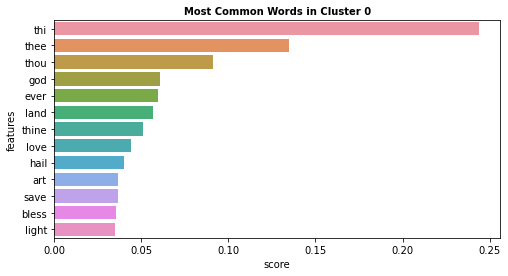

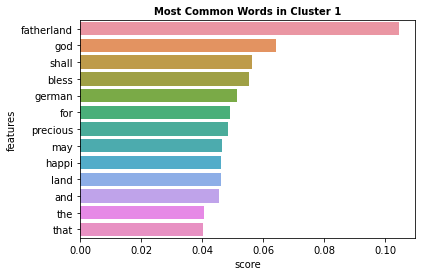

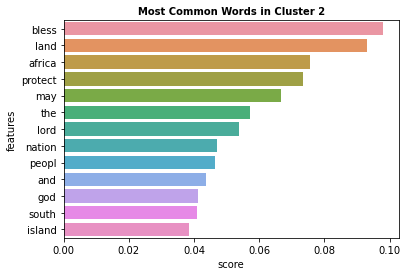

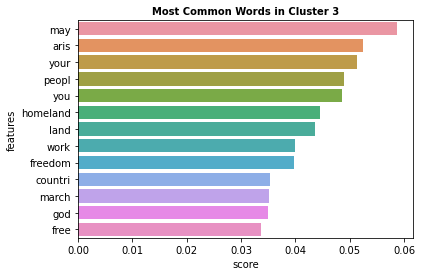

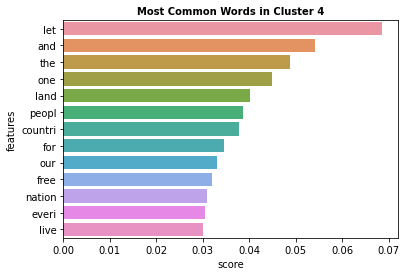

In [ ]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [ ]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()


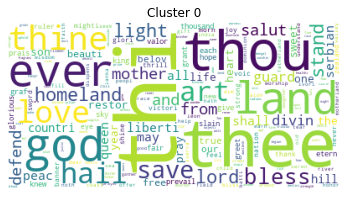

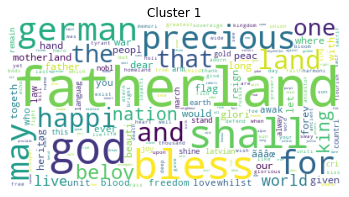

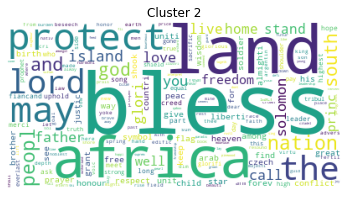

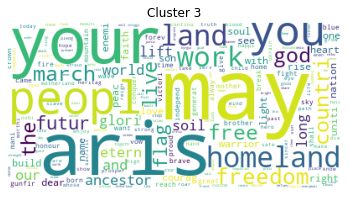

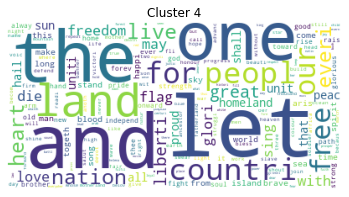

In [ ]:
        
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [ ]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
ds['label'] = labels
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem,label
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",1
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",4
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",3
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",0
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",3
...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,4
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",2
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...",4
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...",4
